# <center>k-means</center>

> 物以类聚，人以群分

![algorithm_sim](./pics/kmeans/algorithm_sim.jpg)

![kmeans_b4_clustering](./pics/kmeans/kmeans_b4_clustering.jpg)

![kmeans_after_clustering](./pics/kmeans/kmeans_after_clustering.jpg)

<hr/>

## Optimisation

$E = \sum \sum D(X, \mu_i)^2$

* $\mu_i 质心$

## Elbow Method for optimal value of k in KMeans

![elbow](./pics/kmeans/elbow.jpg)

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('kmeans').getOrCreate()

In [2]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import * 
from pyspark.sql.types import *
from pyspark.sql.functions import rand, randn
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import sha2

In [5]:
#read the dataset
df=spark.read.csv('./data/music/music.csv',inferSchema=True,header=True)

In [6]:
df.count()

429023

In [7]:
df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- music category: string (nullable = true)



In [8]:
df.select('music category').distinct().count()

21

In [9]:
df.groupBy('music category').count().orderBy('count',ascending=False).show(100,False)

+-----------------+-----+
|music category   |count|
+-----------------+-----+
|Alternative Music|64227|
|Blues            |54647|
|Classical Music  |43117|
|Country Music    |39891|
|Dance Music      |35779|
|Easy Listening   |34356|
|Electronic Music |30985|
|Rap              |29569|
|Hip Hop          |16895|
|Indie Pop        |16244|
|Motivational     |10118|
|Asian Pop        |8444 |
|Jazz             |7685 |
|Latin Music      |7302 |
|New Age          |7053 |
|Opera            |6188 |
|Hindi Music      |5689 |
|Popular          |4729 |
|Soulful          |2403 |
|Reggae           |1970 |
|Rock             |1732 |
+-----------------+-----+



In [10]:
df.select('user_id').distinct().count()

775

In [11]:
df.groupBy('user_id').count().orderBy('count',ascending=False).show(20,False)

+----------------------------------------------------------------+-----+
|user_id                                                         |count|
+----------------------------------------------------------------+-----+
|628119a73b9725466e6c309f803d30cfc3b11d2a426cdd5f0d62a496e105c914|14257|
|179dd34be075e729f14dadc28a34459226c4f62797af5f186bddbb7428b8fc78|11804|
|2d765ea4ffc6554c95a1c703afcd3470bc118a65c2f0728871f4d0f40628f41b|11001|
|ca60aad85306a7fdd51a469ca6a5d27109dfd5f5781d7da985c70574d2520d23|10479|
|03bfd7e24d3a7ce9e3973f9d42ad89e4c1710b89bec59b2b08712ba73372dcbc|10075|
|7660ca8a4f5df748976aac001d5f0c5b7c8806f5c08197542d26c2eac4b20f85|9932 |
|b6eb8ef9cacc79b6779a7e065c3b0fb5174397ea983d70453bc978b6e46f95e2|7694 |
|e92f348b4a29089c9d7b82095d0bd49422153b60bbde08527015121e44699990|7210 |
|da03e0ef521fecb209f01410eefff11c115fda2d217dde51fd870761b31bb968|7182 |
|04cd1fc5c925a8a702607d6c1a047b8e0cbe170bdaed5270369d321f73254b53|6853 |
|a2374ccb47b0af60aafabeed11b979acf0d72e1afe7f96b671

In [12]:
df.groupBy('user_id').count().orderBy('count',ascending=True).show(20,False)

+----------------------------------------------------------------+-----+
|user_id                                                         |count|
+----------------------------------------------------------------+-----+
|e6e6ceb674b7ca53391ac404558a3f8d222db82c643b8c21070db4f029a50095|1    |
|4d5920f000b000d60fdc63043886f47cc056d2835d3a73e50f389a5694b19115|1    |
|bdb448f271ec83b324acd32248f1401964cb1f5f716e94eebed508f02e889e14|1    |
|1e3e7153bf1aa5f43b1d1f27c940087587a50d40d399f4cf31b58546a39b9f26|1    |
|7ba2fabcbbd4705128a8966d4d5fcf9d3e284c77fada7752da397f479ad4a12e|1    |
|a09074b27cd4ab61654c0f4e21bc5e97dc86a611743a1f8b37db3a76df8e306e|1    |
|ecb27d9bf54e751018cd6c1cc5a0f2d812ff08585271acfc980bdacb742a7a02|1    |
|597affc56ba81274561da2b3541a8e1a30f7bbcf75cb54a9f9c1a885d88f7f7b|1    |
|8caf42bf00baea90141dec822bece26fc54bf9884c7dbf0439b445fb98b50152|1    |
|8691b41f5ae65644c8aca0ec9d738eb3b5537b106f0fdcb3f652cc77b7ab7dd6|1    |
|54f2e60bd31a775aca7fb60816c6990a415fe66694098d1ee6

In [13]:
#creating new df with single record for each user
feature_df=df.stat.crosstab("user_id", "music category")

In [16]:
feature_df.printSchema()

root
 |-- user_id_music category: string (nullable = true)
 |-- Alternative Music: long (nullable = true)
 |-- Asian Pop: long (nullable = true)
 |-- Blues: long (nullable = true)
 |-- Classical Music: long (nullable = true)
 |-- Country Music: long (nullable = true)
 |-- Dance Music: long (nullable = true)
 |-- Easy Listening: long (nullable = true)
 |-- Electronic Music: long (nullable = true)
 |-- Hindi Music: long (nullable = true)
 |-- Hip Hop: long (nullable = true)
 |-- Indie Pop: long (nullable = true)
 |-- Jazz: long (nullable = true)
 |-- Latin Music: long (nullable = true)
 |-- Motivational: long (nullable = true)
 |-- New Age: long (nullable = true)
 |-- Opera: long (nullable = true)
 |-- Popular: long (nullable = true)
 |-- Rap: long (nullable = true)
 |-- Reggae: long (nullable = true)
 |-- Rock: long (nullable = true)
 |-- Soulful: long (nullable = true)



In [17]:
feature_df.show(3,False)

+----------------------------------------------------------------+-----------------+---------+-----+---------------+-------------+-----------+--------------+----------------+-----------+-------+---------+----+-----------+------------+-------+-----+-------+---+------+----+-------+
|user_id_music category                                          |Alternative Music|Asian Pop|Blues|Classical Music|Country Music|Dance Music|Easy Listening|Electronic Music|Hindi Music|Hip Hop|Indie Pop|Jazz|Latin Music|Motivational|New Age|Opera|Popular|Rap|Reggae|Rock|Soulful|
+----------------------------------------------------------------+-----------------+---------+-----+---------------+-------------+-----------+--------------+----------------+-----------+-------+---------+----+-----------+------------+-------+-----+-------+---+------+----+-------+
|ca3c4285512798abe7d81fa2d0588549211be9516d9b2050e5564f8e912312c7|65               |0        |7    |8              |7            |12         |7             |

In [18]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [19]:
print(feature_df.columns)

['user_id_music category', 'Alternative Music', 'Asian Pop', 'Blues', 'Classical Music', 'Country Music', 'Dance Music', 'Easy Listening', 'Electronic Music', 'Hindi Music', 'Hip Hop', 'Indie Pop', 'Jazz', 'Latin Music', 'Motivational', 'New Age', 'Opera', 'Popular', 'Rap', 'Reggae', 'Rock', 'Soulful']


In [20]:
feat_cols=[col for col in feature_df.columns if col != 'user_id_music category']

In [21]:
print(feat_cols)

['Alternative Music', 'Asian Pop', 'Blues', 'Classical Music', 'Country Music', 'Dance Music', 'Easy Listening', 'Electronic Music', 'Hindi Music', 'Hip Hop', 'Indie Pop', 'Jazz', 'Latin Music', 'Motivational', 'New Age', 'Opera', 'Popular', 'Rap', 'Reggae', 'Rock', 'Soulful']


In [22]:
vec_assembler = VectorAssembler(inputCols = feat_cols, outputCol='features')
final_data = vec_assembler.transform(feature_df)

In [23]:
print(final_data.printSchema())

root
 |-- user_id_music category: string (nullable = true)
 |-- Alternative Music: long (nullable = true)
 |-- Asian Pop: long (nullable = true)
 |-- Blues: long (nullable = true)
 |-- Classical Music: long (nullable = true)
 |-- Country Music: long (nullable = true)
 |-- Dance Music: long (nullable = true)
 |-- Easy Listening: long (nullable = true)
 |-- Electronic Music: long (nullable = true)
 |-- Hindi Music: long (nullable = true)
 |-- Hip Hop: long (nullable = true)
 |-- Indie Pop: long (nullable = true)
 |-- Jazz: long (nullable = true)
 |-- Latin Music: long (nullable = true)
 |-- Motivational: long (nullable = true)
 |-- New Age: long (nullable = true)
 |-- Opera: long (nullable = true)
 |-- Popular: long (nullable = true)
 |-- Rap: long (nullable = true)
 |-- Reggae: long (nullable = true)
 |-- Rock: long (nullable = true)
 |-- Soulful: long (nullable = true)
 |-- features: vector (nullable = true)

None


In [24]:
from pyspark.ml.feature import StandardScaler

In [25]:
#scaling the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [26]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(final_data)

In [27]:
# Normalize each feature to have unit standard deviation.
cluster_final_data = scalerModel.transform(final_data)

In [28]:
cluster_final_data.columns

['user_id_music category',
 'Alternative Music',
 'Asian Pop',
 'Blues',
 'Classical Music',
 'Country Music',
 'Dance Music',
 'Easy Listening',
 'Electronic Music',
 'Hindi Music',
 'Hip Hop',
 'Indie Pop',
 'Jazz',
 'Latin Music',
 'Motivational',
 'New Age',
 'Opera',
 'Popular',
 'Rap',
 'Reggae',
 'Rock',
 'Soulful',
 'features',
 'scaledFeatures']

In [29]:
errors=[]

for k in range(2,10):
    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(cluster_final_data)
    wssse = model.computeCost(cluster_final_data)
    errors.append(wssse)
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(wssse))
    print('--'*30)

With K=2
Within Set Sum of Squared Errors = 13171.843878802949
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 12124.384526593776
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 11889.488664034188
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 10808.460975482285
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 9514.975534943547
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 9176.387862752983
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 8665.852198866673
------------------------------------------------------------
With K=9
Within Set Sum of Squared Errors = 8320.517817802725
------------------------------------------------------------


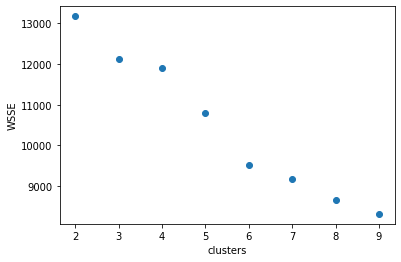

In [30]:
cluster_number = range(2,10)
plt.scatter(cluster_number,errors)
plt.xlabel('clusters')
plt.ylabel('WSSE')
plt.show()

In [31]:
#Selecting k =6 for kmeans clustering
kmeans6 = KMeans(featuresCol='scaledFeatures',k=6)

In [32]:
#Fitting the model on data
model_k6 = kmeans6.fit(cluster_final_data)

In [40]:
cluser_prediction=model_k6.transform(cluster_final_data)

In [42]:
cluser_prediction.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    1|
|         3|    6|
|         5|    1|
|         4|   41|
|         2|    1|
|         0|  725|
+----------+-----+

